In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from math import sqrt
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('./day03_data/Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
# 데이터 내 결측치 합계 : 결측치 존재 여부 확인
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


/usr/local/Caskroom/miniforge/base/envs/ICT/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


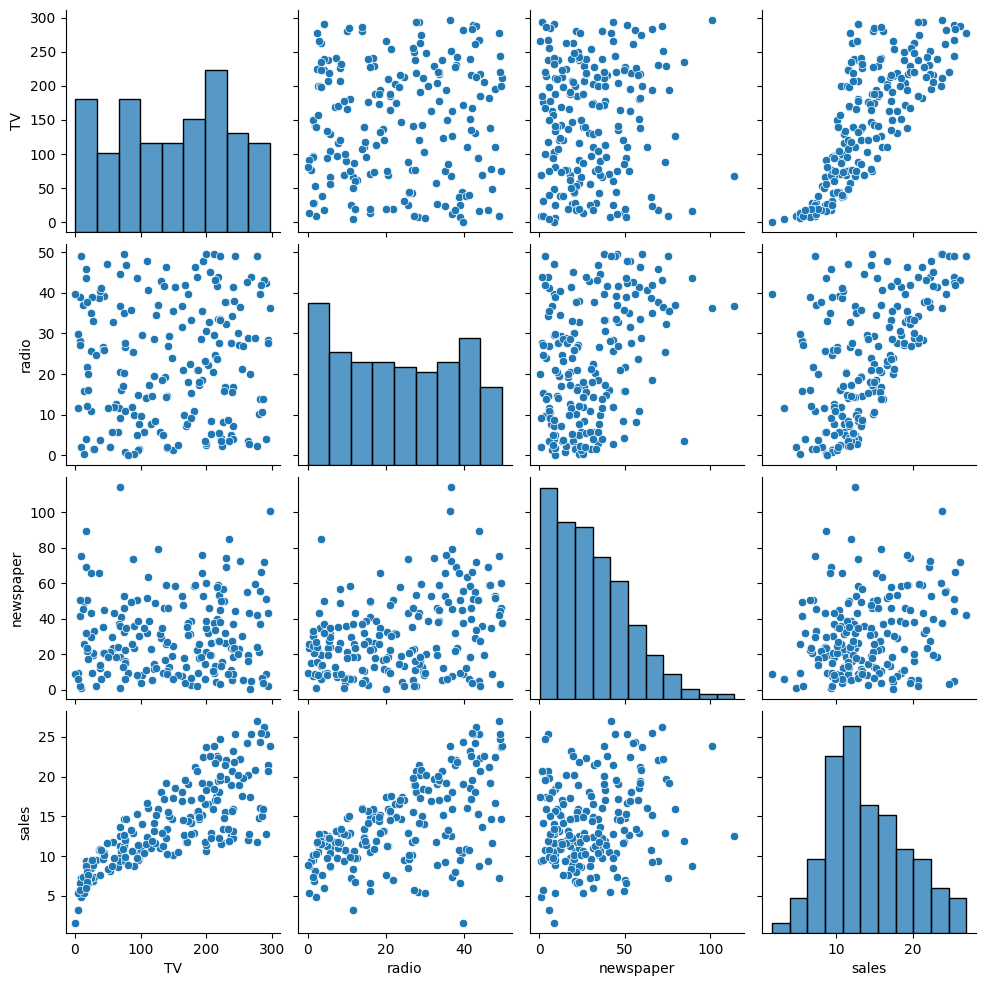

In [7]:
sns.pairplot(df)

In [8]:
model = sm.ols(formula = "sales ~ TV", data = df).fit()
model.summary()

# Intercept: X 가 0 일때 시작하는 Y 값
# Y = wX + b
# Y = wx + intercept(7.0326)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        08:05:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# radio를 포함한 회귀 모델 만들기
model = sm.ols(formula = "sales ~ TV + radio", data = df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.83e-98
Time:                        08:05:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x = df[['TV', 'radio']]
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [12]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
X_test

,TV,radio
58,210.8,49.6
40,202.5,22.3
34,95.7,1.4
102,280.2,10.1
184,253.8,21.3
198,283.6,42.0
95,163.3,31.6
4,180.8,10.8
29,70.6,16.0
168,215.4,23.6


In [14]:
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 2)
(160, 2)
(160,)
(40,)


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([21.75602835, 16.45283   ,  7.68498075, 17.89854771, 18.67725322,
       23.8001131 , 16.28958747, 13.36567675,  9.13663933, 17.29146113,
       14.41976185,  9.88105063, 17.33065475, 16.69814917, 15.00680872,
       15.48131088, 12.43241041, 17.31064343, 11.16764004, 18.13321062,
        9.38132296, 12.71353738,  8.75011855, 10.5014414 , 11.37124838,
       15.03593604,  9.77378461, 19.48694106, 18.32570002, 17.20710464,
       21.66189194, 14.55054628, 16.37218182, 12.32883551, 20.02621323,
       15.39390999, 13.98341958, 10.03852687, 21.01121113,  7.48429727])

In [18]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.8958528468776601
0.894734495002707


In [19]:
beta_0 = model.intercept_   # 절편
beta_1 = model.coef_[0]     # x1 변수의 기울기
beta_2 = model.coef_[1]     # x2 변수의 기울기

In [20]:
# 모델식
print("y = ", beta_0, "+", beta_1, "x TV +", beta_2, "x radio + e")

y =  2.947515036029003 + 0.046869974980173416 x TV + 0.18000650373005062 x radio + e


In [21]:
# 경사하강법(SGD: Stochastic Gradient Descent)
# 어디가 최소값인지 정확하지 않아 여러번 돌려보면서 파악해야함 + 과적합 발생 가능
# 멘토님 의견: loss function 그래프를 그려 test 그래프가 튀는 지점(과적합) 이전의 최소값을 최소로 지정
from sklearn.linear_model import SGDRegressor
X = df[['TV', 'radio']]
Y = df['sales']

model = SGDRegressor(loss = 'squared_error', eta0 = 0.0001, max_iter = 10000, random_state = 999)     # eta: 몇 수치씩 하강할것인지 결정 / max_iter: epoch와 비슷
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, Y_test))

0.8537728821656432


In [22]:
# 회귀분석을 이용한 분류(classification)
# y 값이 불연속 변수일 경우에 사용
# 데이터가 어떤 범주에 속할 확률을 예측하고 그 확률에 따른 범주로 분류

from sklearn.linear_model import LogisticRegression
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head(10)

# target = class(0: 레드와인, 1: 화이트와인)


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0
6,9.4,1.6,3.30,0.0
7,10.0,1.2,3.39,0.0
8,9.5,2.0,3.36,0.0
9,10.5,6.1,3.35,0.0


In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [24]:
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [25]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


/usr/local/Caskroom/miniforge/base/envs/ICT/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


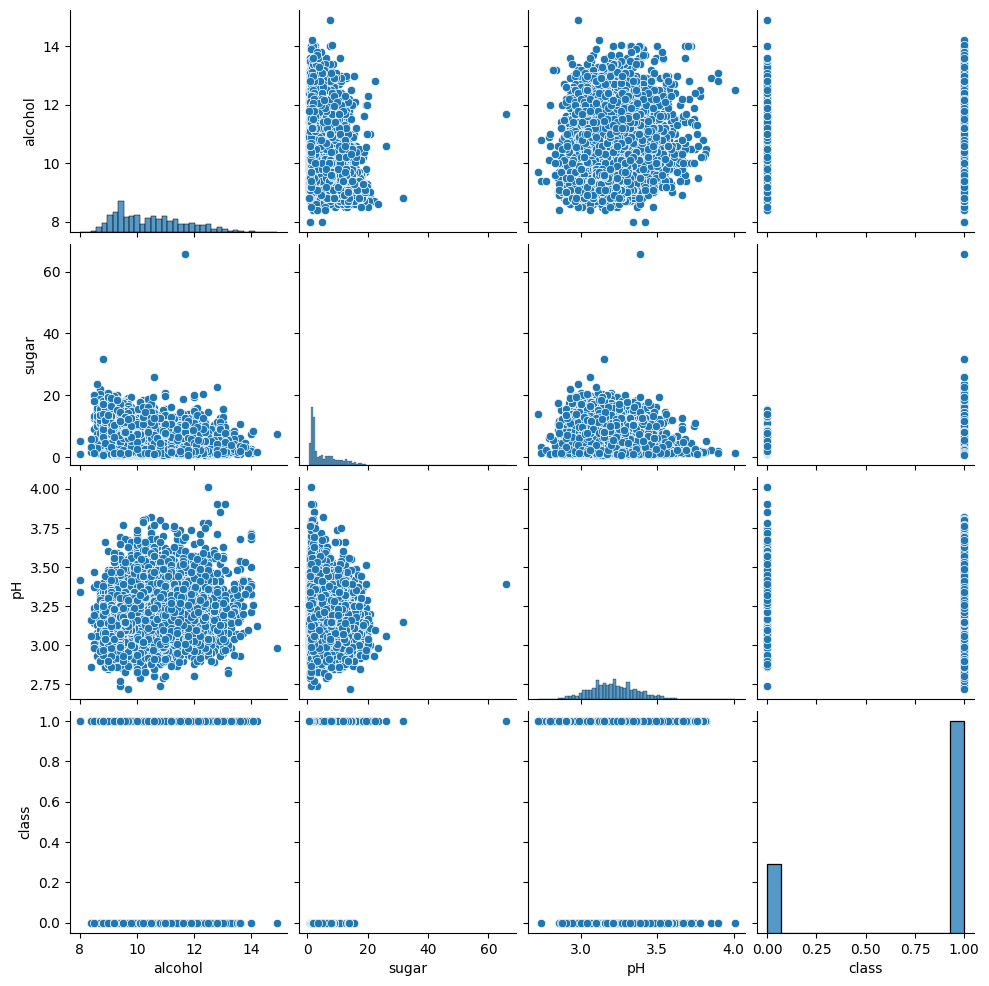

In [26]:
sns.pairplot(wine)
plt.show()

In [27]:
# 로지스틱 회귀분석을 이용한 클래스 분류

X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

print(lr.coef_, lr.intercept_)
# 각 점수에 따라 해당 확률만큼 맞게 분류를 했다고 판단할 수 있다

0.7785260727342698
0.7892307692307692
[[ 0.43629219  0.35598369 -4.21031768]] [8.8100406]
